In [1]:
import torch # Core torch module

# x = torch.Tensor([5,3]) # A tensor is an array
# y = torch.Tensor([2,1])
# x = torch.zeros([2,5]) # Creates an array with just zeros

# y = y.view # Will convert the 2,1 matrix into a single dimensional array 

In [2]:
import torchvision # Provides vision data for preprocessing
from torchvision import transforms, datasets # Dealing with datasets and transforming them so the NN can intake the data

In [46]:
# The "" means the dataset will be downloaded locally.
# Our training data
# MNIST is a 28x28 hand drawn numbers dataset from 0-9
train = datasets.MNIST("", train = True, download=True, transform = transforms.Compose([transforms.ToTensor()])) # Data is not naitivly in Tensor so we have to import it using transforms.ToTensor(). 
test = datasets.MNIST("", train = False, download = True, transform = transforms.Compose([transforms.ToTensor()])) # Our Testing data

# Batch size is the amount of data inputed into the neural network(Usually in multiples of 8)
# Shuffle is to prevent the neural network from taking the easy way out or to generalize things too much
# Batch_size and shuffle will have to be down manually if providing a personal datasheet
trainset = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True) # Loads the data from the train variable. 
testset = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)# Loads the data from the testing variable 

for data in trainset: # Iterates over the dataset.
    print(data)
    break
x, y = data[0][0], data[1][0] #  It will contain a tensor of tensors of images and a tensor of tensors of labels

# print(y)
# print(x)

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

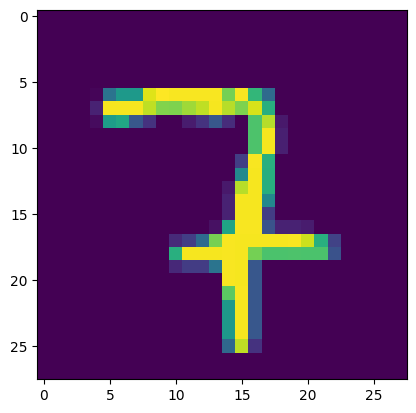

In [47]:
import matplotlib.pyplot as plt # Allows us to plot in python
# Keep in mind with the shaping of the tensors when importing your own array
# Usually looks like (torch.Size([1, 28, 28])). The one needs to be there to please pytorch libraries.

plt.imshow(data[0][0].view(28,28)) # Shows the image from the dataset as a 28x28
plt.show()

In [48]:
print(data[0][0].shape) # prints the dimensions of the image

torch.Size([1, 28, 28])


In [49]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0,} # Creates a dictionary that tells us if the dataset is balanced 
for data in trainset: # Interates over the data and prints it out.
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [50]:
for i in counter_dict: # Prints out 0-9 with the percentage of that number in the dataset. 
    print(f"{i}: {counter_dict[i]/total*100}")

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [51]:
#---------------------------------------------------------------------------------------------------------------------
# Neural Network code
import torch.nn as nn # Object orientated part of torch.nn. (Used most of the time)
import torch.nn.functional as F # Just the function part of torch.nn. (Used some of the time)

In [52]:
class Net(nn.Module): # Neural networks are usually done in classes
    def __init__(self):
        super().__init__() # Super is in the nn.Module pack. Runs the initialization for nn.Module. It inherits methods from nn.Module
        # The 28*28 is the extent of the input layer while the 64 is the extent of the hidden layer. EX: 28x28 (Flattened image). 
        # The output would be the target amount of neurons. EX: 64 neurons for x amount of layers
        self.fc1 = nn.Linear(28*28, 64) # fc1 stands for fully connected layer 1. The input would be replaced with the size of the image. 
        self.fc2 = nn.Linear(64, 64) # The first 64 needs to take in 64 as the previous layer outputs 64. The second 64, which is the amount of neurons, can be any amount.
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10) # The 10 is the number of outputs desired. Change this value depending on the desired amount of outputs
    def forward(self, x): # X represents the data passing through the neural network. Can throw in logic into this step. 
        x = F.relu(self.fc1(x)) # F.relu is the activation function from Pytorch. Basically it is saying if the neuron is firing/activating 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) # We just want to pass the data for the output
        return F.log_softmax(x, dim=1) # log_softmax is a general optimizer for multi class. The dimension is assumed to be 1 most of the time. 


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [53]:
X = torch.rand((28, 28)) # Mimics an actual image to test the layers. 28x28 states the dimensions. 
# print(X) 
X = X.view(-1, 28*28) # Needs to be like this for the libraries. The -1 specifies the input will be of an unknown shape. Also works with 1 as it is a 1x28x28 sized array.

print(X) # Passes information through the neural network

tensor([[4.4062e-01, 9.5609e-01, 3.6271e-01, 4.1446e-01, 7.2801e-02, 2.5703e-01,
         9.6516e-01, 3.7933e-01, 8.6178e-02, 3.5573e-01, 9.8729e-02, 9.7505e-01,
         5.6597e-01, 1.8392e-01, 6.8762e-01, 6.1951e-01, 9.3889e-01, 8.5474e-01,
         4.1956e-01, 9.4301e-02, 6.9385e-01, 3.3884e-01, 5.6603e-01, 5.8345e-01,
         5.0146e-01, 5.7038e-01, 5.7445e-01, 7.0838e-02, 2.5942e-01, 3.3970e-02,
         2.4056e-01, 2.3967e-01, 3.3454e-01, 3.0323e-01, 3.7744e-01, 9.4922e-01,
         3.4932e-01, 5.8992e-02, 9.7531e-01, 8.4144e-01, 6.0111e-01, 5.7401e-02,
         5.9169e-01, 9.0651e-01, 4.1575e-01, 6.7880e-01, 4.5628e-01, 9.7668e-02,
         4.0395e-01, 9.8240e-02, 7.7984e-01, 5.0411e-01, 1.3547e-01, 7.2459e-01,
         7.0555e-02, 9.3243e-01, 7.3857e-01, 6.5866e-01, 3.2578e-01, 4.9466e-01,
         3.4987e-01, 8.1107e-01, 8.5789e-01, 4.8138e-01, 5.8848e-01, 7.9477e-01,
         9.7852e-01, 4.8040e-02, 8.3051e-01, 7.0623e-01, 2.4039e-02, 8.7165e-01,
         2.3434e-01, 1.8191e

In [54]:
import torch.optim as optim # Is the library for the optimizer and loss
# The 0.001 can also be represented as 1e-3
# the learning rate number is the size of the step that the optimiser will take to get to the best place when passing data through the neural network
# Usually people use the decaying rate where the the ml model takes big leaps in learning then progressively gets smaller and smaller 
optimizer = optim.Adam(net.parameters(), lr = 0.001) # .Adam takes in two parameters: one being the net.parameters which corresponds to everything that is adjustable in our model and lr (Learning rate). 

EPOCHS = 3 # Means 3 full passes through the dataset

for epoch in range(EPOCHS): # Iterates through the number associated in EPOCHS 
    for data in trainset: # Data is a batch of feature sets and labels
        X, y = data 
        net.zero_grad() # This clears out the old gradients from the previous batch as it would accumulate otherwise which will lead to incorrect updates
        output = net(X.view(-1, 28*28)) # Reshapes the input tensor x so it is suitable for input into the neural network
        loss = F.nll_loss(output, y) # Calculates the loss of the neural network. If the dataset value is a scalar value, use nll_loss. If the dataset value is a hot vector(Ex: (0,0,1,0)), use means_square_error.
        loss.backward() # back propagates for us
        optimizer.step() # Adjust the weights for us. 

    print(loss) # If loss is going down, that is good

tensor(0.2904, grad_fn=<NllLossBackward0>)
tensor(0.1440, grad_fn=<NllLossBackward0>)
tensor(0.0153, grad_fn=<NllLossBackward0>)


In [56]:
# To see how correct we are
correct = 0 
total = 0

with torch.no_grad(): # We do not want to calculate gradients. We just want to know how good the network is.
    for data in trainset: # iterates over the batches of data in the training set
        X, y = data
        output = net(X.view(-1, 784)) # The 784 came from the original dimensions of 28x28 which is 784. You can also use 28*28 too.
        for idx, i in enumerate(output): # Iterates over the prediction made by the neural network for the current batch. The idx is the index of the prediction and i is the actual predicted tensor for each sample
            if torch.argmax(i) == y[idx]: # Checks if the index of the maximum value(the predicted class) equals the true label at the same index
                correct += 1
            total += 1
print("Accuracy", round(correct/total, 3)) # Calculates the accuracy percentage
# High percentage in actual real implementations of neural network is not really practical but for this dataset, it is ok as it is an easy one.

Accuracy 0.973


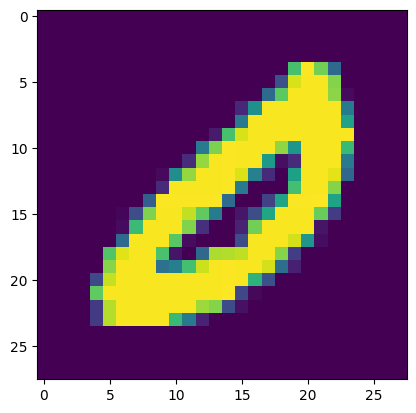

In [61]:
plt.imshow(X[0].view(28,28)) # Prints the number associated to the 0 index
plt.show()


In [62]:
print(torch.argmax(net(X[0].view(-1,28*28))[0])) # Predicts what the above image is. In this case, it is a zero.

tensor(0)


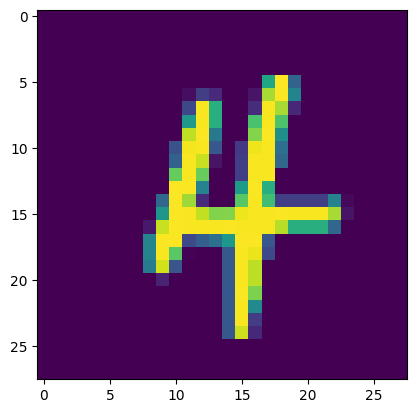

In [63]:
plt.imshow(X[1].view(28,28)) # Prints the number associated to the index 1
plt.show()


In [64]:
print(torch.argmax(net(X[1].view(-1,28*28))[0])) # Predicts what the number above is. It is 4. 

tensor(4)


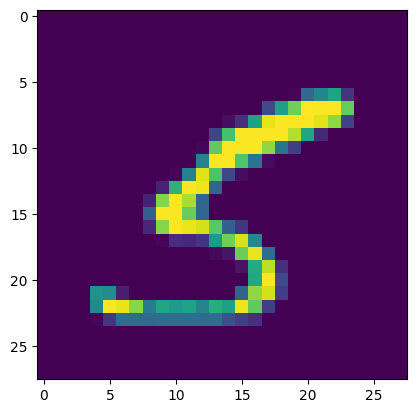

In [65]:
plt.imshow(X[2].view(28,28)) # Prints the number associated to the index 2
plt.show()

In [66]:
print(torch.argmax(net(X[2].view(-1,28*28))[0])) # Predicts what the number above is. It is 5. 

tensor(5)


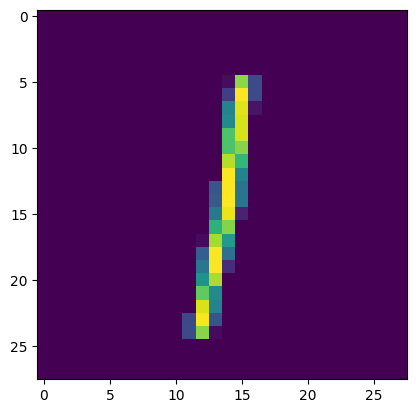

In [68]:
plt.imshow(X[3].view(28,28)) # Prints the number associated to the index 3
plt.show()

In [70]:
print(torch.argmax(net(X[3].view(-1,28*28))[0]))# Predicts what the number above is. It is 1. 

tensor(1)


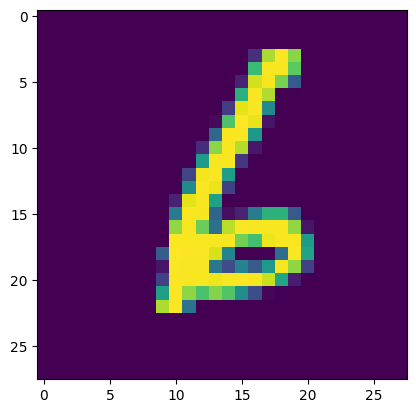

In [71]:
plt.imshow(X[4].view(28,28)) # Prints the number associated to the index 4
plt.show()

In [72]:
print(torch.argmax(net(X[4].view(-1,28*28))[0]))# Predicts what the number above is. It is 6.

tensor(6)
